# A Simple Trading Strategy in Zipline

https://analyzingalpha.com/a-simple-trading-strategy-in-zipline-and-jupyter

In [19]:
%load_ext zipline
import zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [37]:
from zipline.api import order_target_percent, record, symbol, set_benchmark, get_open_orders
import matplotlib.pyplot as plt
import pandas as pd
import pytz

In [38]:
def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')
    set_benchmark(symbol('AAPL'))

In [39]:
def handle_data(context, data):
    # Skip first 200 days to get full windows
    context.i += 1
    if context.i < 200:
        return
    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=50, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=200, frequency="1d").mean()

    # Trading logic
    open_orders = get_open_orders()

    if context.asset not in open_orders:
        if short_mavg > long_mavg:
            # order_target orders as many shares as needed to
            # achieve the desired number of shares.
            order_target_percent(context.asset, 1.0)
        elif short_mavg < long_mavg:
            order_target_percent(context.asset, 0.0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
        short_mavg=short_mavg,
        long_mavg=long_mavg)

In [27]:
start = pd.Timestamp('2000-01-01')
end = pd.Timestamp('2017-12-31')

perf = zipline.run_algorithm(start=start,
                            end=end,
                            initialize=initialize,
                            capital_base=10000,
                            handle_data=handle_data,
                            bundle='quandl')

In [28]:
perf

,period_open,period_close,long_value,short_value,long_exposure,ending_exposure,short_exposure,gross_leverage,starting_exposure,net_leverage,...,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,AAPL,short_mavg,long_mavg
2000-01-03 21:00:00+00:00,2000-01-03 14:31:00+00:00,2000-01-03 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,NaN,0.000000,0.000000,0.0,0.0,1,2000-01,NaN,NaN,NaN
2000-01-04 21:00:00+00:00,2000-01-04 14:31:00+00:00,2000-01-04 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,NaN,0.000000,0.000000,0.0,0.0,2,2000-01,NaN,NaN,NaN
2000-01-05 21:00:00+00:00,2000-01-05 14:31:00+00:00,2000-01-05 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,NaN,0.000000,0.000000,0.0,0.0,3,2000-01,NaN,NaN,NaN
2000-01-06 21:00:00+00:00,2000-01-06 14:31:00+00:00,2000-01-06 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,NaN,0.000000,0.000000,0.0,0.0,4,2000-01,NaN,NaN,NaN
2000-01-07 21:00:00+00:00,2000-01-07 14:31:00+00:00,2000-01-07 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,NaN,0.000000,0.000000,0.0,0.0,5,2000-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,477777.3,0.0,477777.3,477777.3,0.0,1.000002,477777.3,1.000002,...,1.373206,-0.577612,1.028459,0.0,0.0,4524,2017-12,175.01,169.01234,154.856400
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,465656.1,0.0,465656.1,465656.1,0.0,1.000002,477777.3,1.000002,...,1.364710,-0.577612,1.028459,0.0,0.0,4525,2017-12,170.57,169.28394,155.018820
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,465738.0,0.0,465738.0,465738.0,0.0,1.000002,465656.1,1.000002,...,1.364612,-0.577612,1.028459,0.0,0.0,4526,2017-12,170.60,169.49834,155.182435
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,467048.4,0.0,467048.4,467048.4,0.0,1.000002,465738.0,1.000002,...,1.365307,-0.577612,1.028459,0.0,0.0,4527,2017-12,171.08,169.71054,155.341160


In [49]:
def analyze(perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2, figsize = (12, 8))
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.loc[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.loc[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

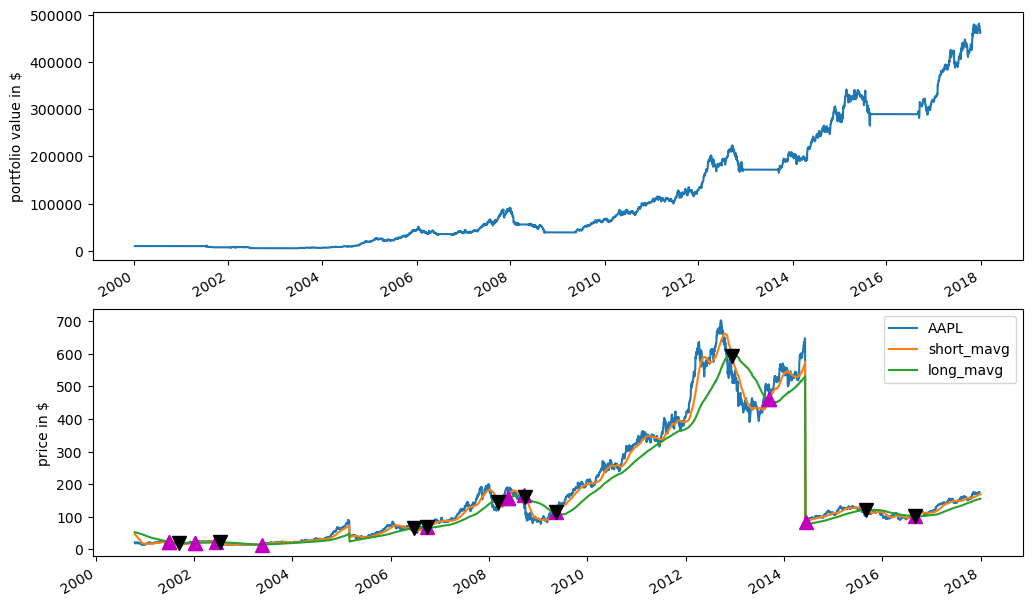

In [51]:
analyze(perf)

Start date,2000-01-03
End date,2017-12-29
Total months,215
,Backtest
Annual return,23.778%
Cumulative returns,4519.97%
Annual volatility,27.864%
Sharpe ratio,0.91
Calmar ratio,0.41
Stability,0.93
Max drawdown,-57.761%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,57.76,2007-12-28,2008-09-23,2010-09-22,714
1,53.57,2001-07-17,2003-06-09,2004-09-08,822
2,34.42,2006-01-13,2006-10-11,2007-05-21,352
3,25.90,2012-09-19,2013-09-16,2014-05-23,438
4,24.28,2005-02-16,2005-05-12,2005-08-12,128


Stress Events,mean,min,max
Dotcom,0.00%,0.00%,0.00%
Lehman,-0.45%,-8.61%,5.09%
9/11,0.00%,0.00%,0.00%
US downgrade/European Debt Crisis,-0.01%,-5.46%,5.89%
Fukushima,-0.22%,-4.46%,2.61%
US Housing,0.00%,0.00%,0.00%
EZB IR Event,-0.25%,-2.60%,2.43%
Aug07,0.26%,-5.69%,5.73%
Mar08,-0.10%,-2.86%,2.38%
Sept08,-1.19%,-8.61%,5.09%


Top 10 long positions of all time,max
sid,
AAPL,102.85%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
AAPL,102.85%


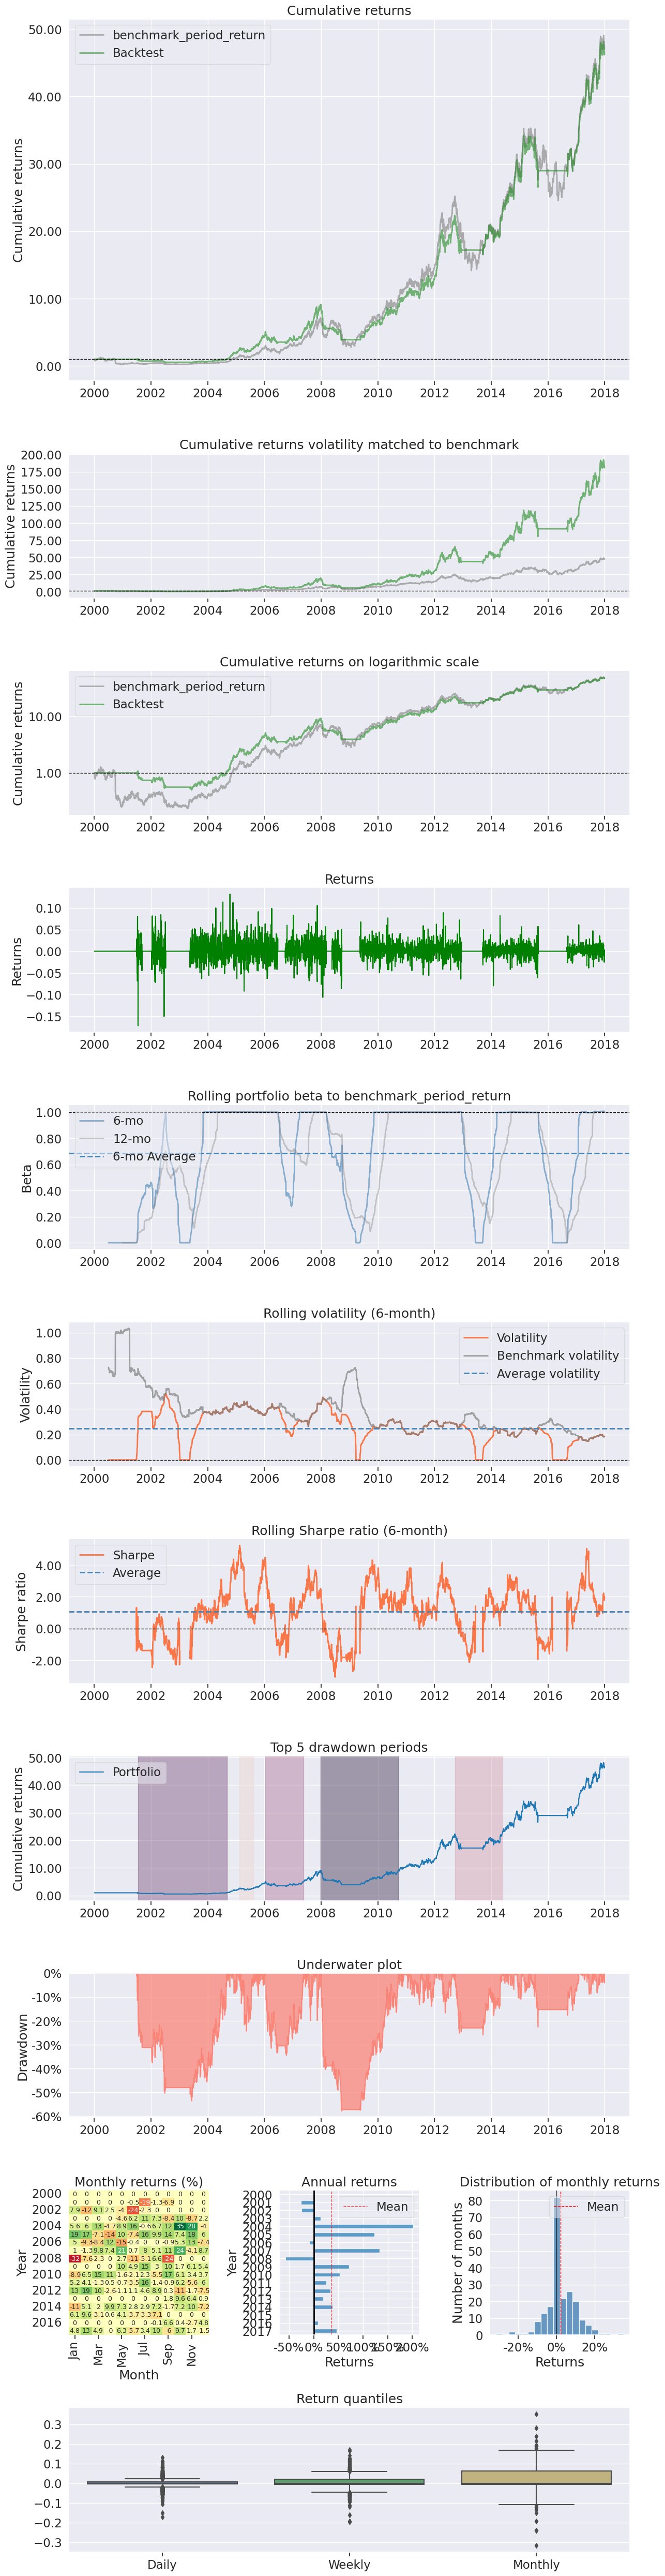

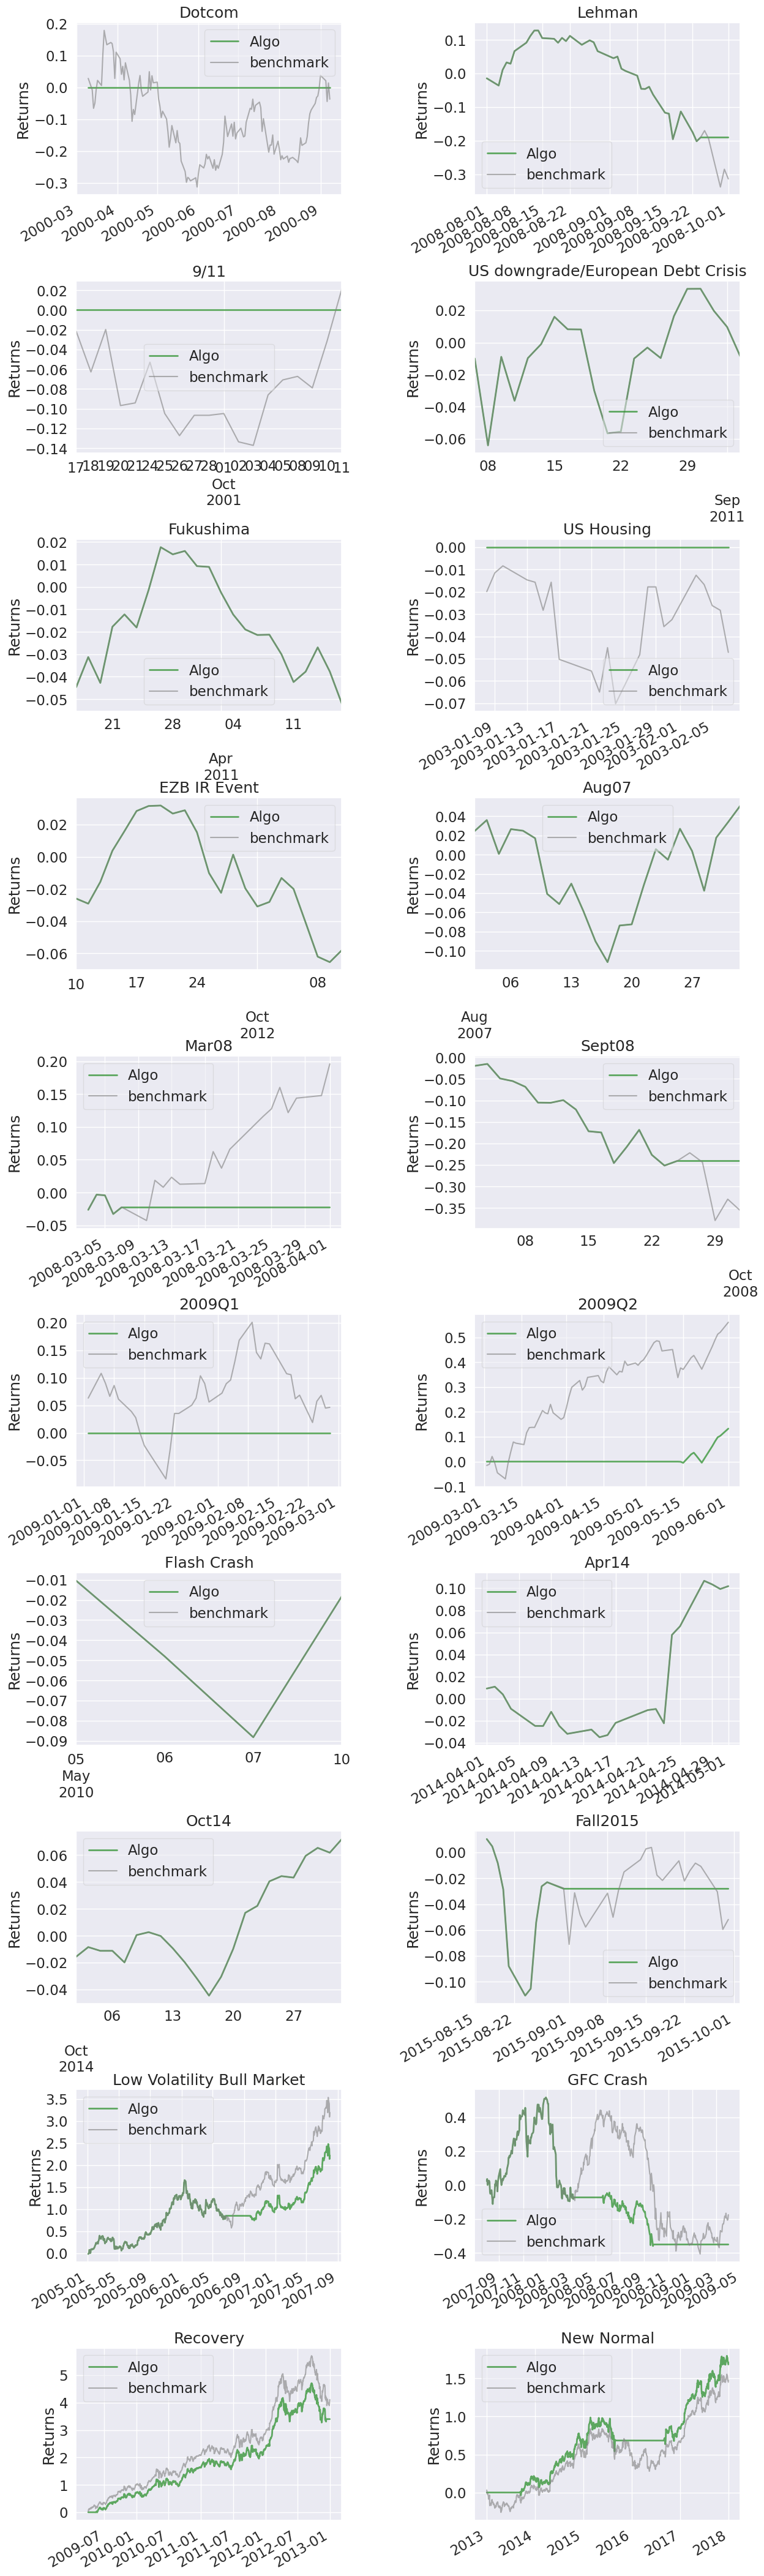

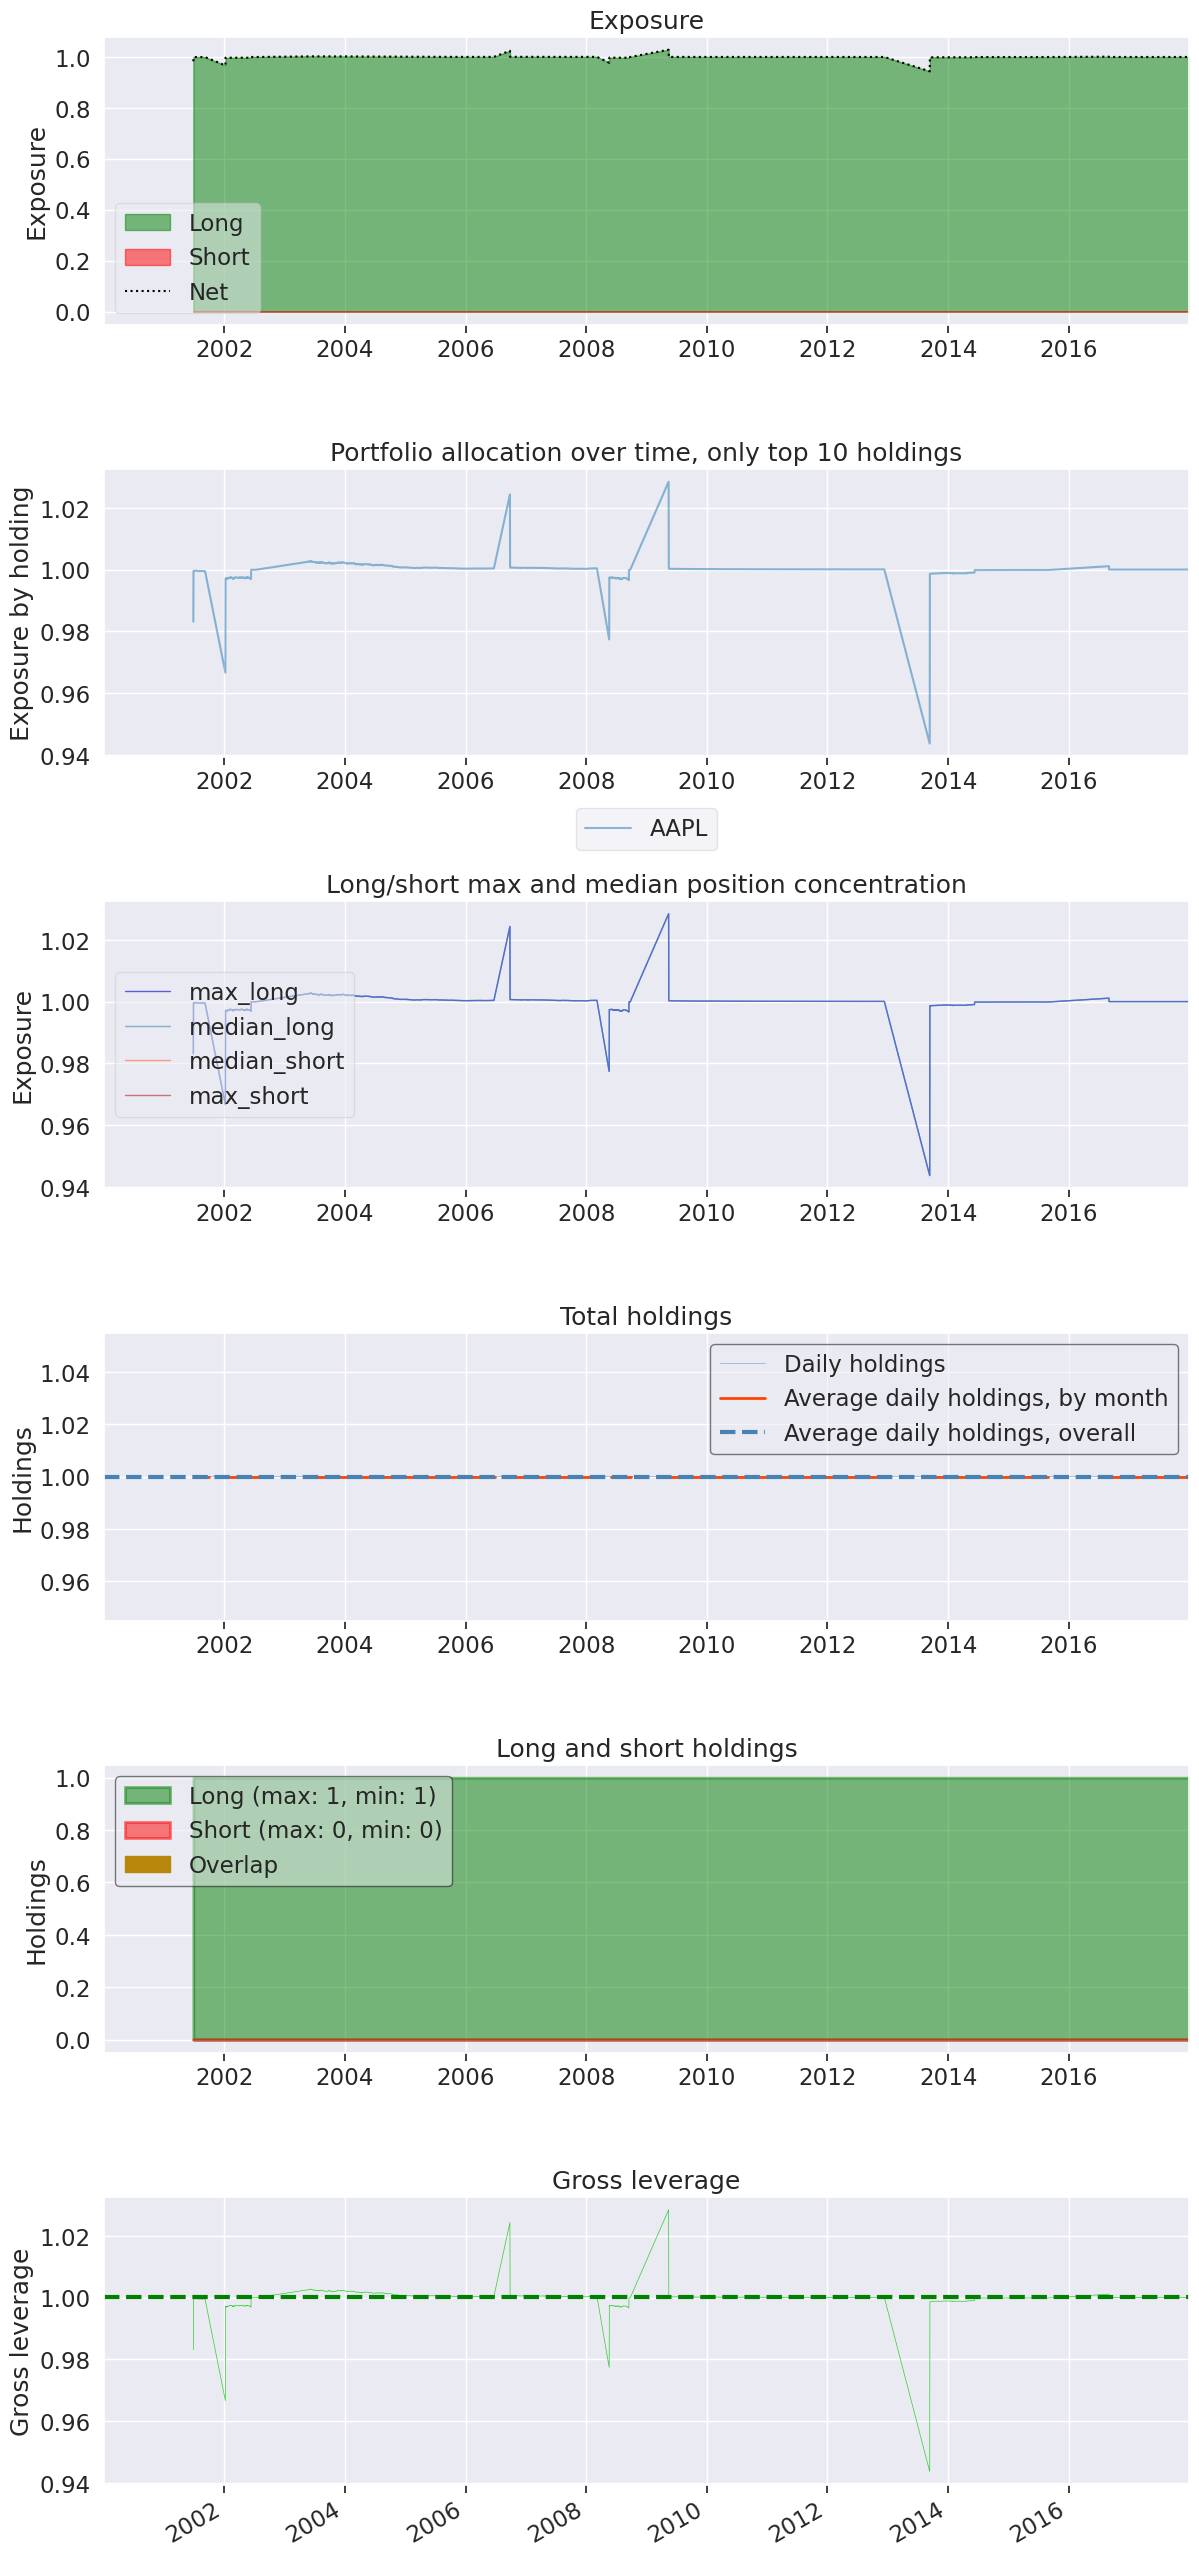

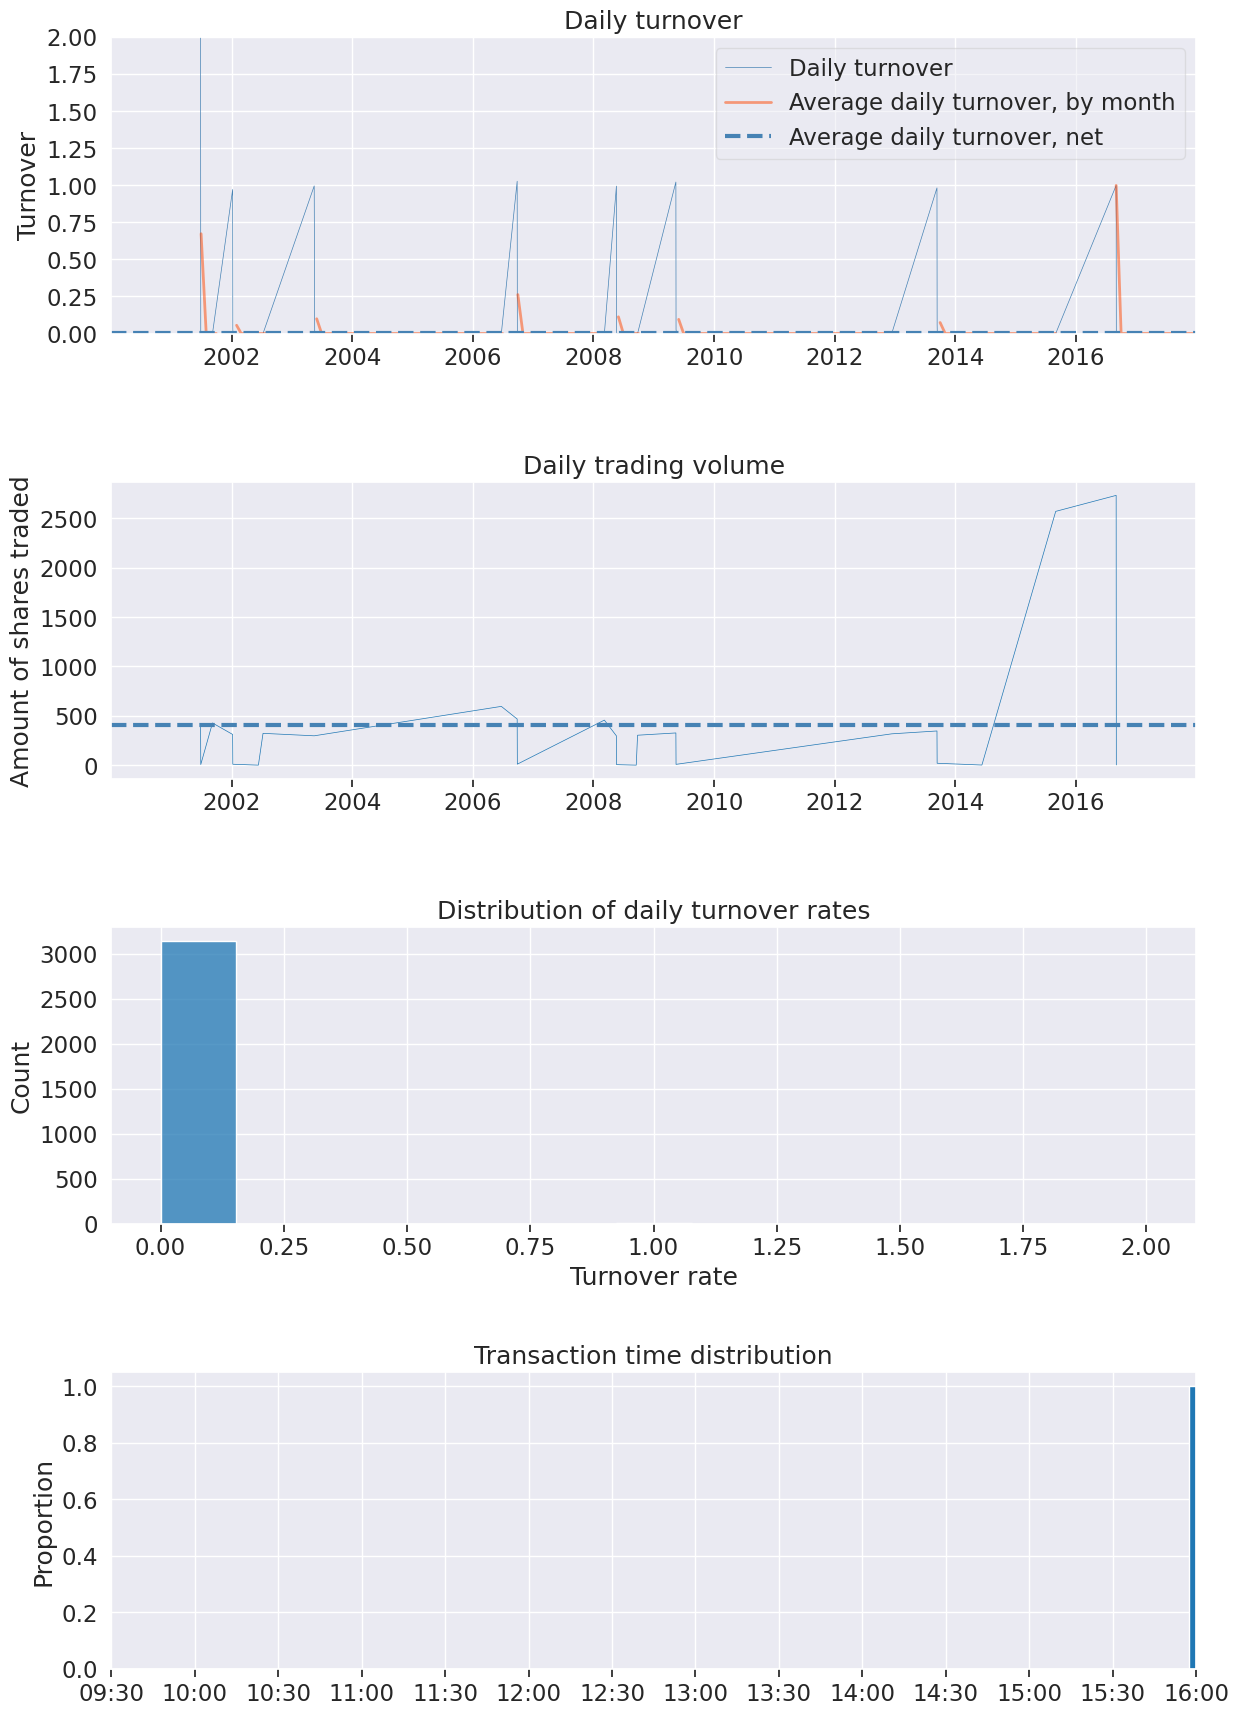

In [53]:
import pyfolio as pf
import numpy as np

# Extract algo returns and benchmark returns
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
benchmark_period_return = perf['benchmark_period_return']

# Convert benchmark returns to daily returns
#daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

# Create tear sheet
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)